# Taller Clasificación – Minería de Datos – 2025-I

**Facultad de Ingeniería**  
Departamento de Ingeniería de Sistemas e Industrial  
Universidad Nacional de Colombia – Sede Bogotá

---

## Estudiantes

- **Francisco José Salamanca Rivera**  
  _fsalamancar@unal.edu.co_  
- **Daniel Mauricio Bonilla Muñoz**  
  _dabonilla@unal.edu.co_  
- **David Camilo Gómez Medina**  
  _dcgomezne@unal.edu.co_  

---

## Docente

- **Elizabeth León Guzmán**  
  _eleonguz@unal.edu.co_

## Bayes

### Punto 1:

Crear un modelo usando Naive Bayes a un conjunto de datos categórico.

a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrena-
miento y 30 % para test.

b) Entrenar el modelo

c) Aplicar el modelo al conjunto de test

d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OrdinalEncoder

# dataset categorico sintetico
np.random.seed(42)
n_samples = 1000
n_features = 5
n_categories = 3

# caracteristicas categoricas
X_cat = np.random.randint(0, n_categories, size=(n_samples, n_features))

#  variable objetivo basada en reglas logicas
y = np.zeros(n_samples, dtype=int)
for i in range(n_samples):
    if X_cat[i, 0] == 1 and X_cat[i, 2] != 0:
        y[i] = 1
    elif X_cat[i, 1] == 2 and X_cat[i, 3] == 1:
        y[i] = 1
    elif X_cat[i, 4] == 0:
        y[i] = 1

# Convertir a DataFrame
features = [f'Cat_{i+1}' for i in range(n_features)]
df = pd.DataFrame(X_cat, columns=features)
df['Target'] = y

print("Dataset categórico sintético:")
print(df.head())
print("\nDistribución de clases:")
print(df['Target'].value_counts(normalize=True))

# a) 70 train - 30 test
X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y, test_size=0.3, stratify=y, random_state=42
)

# b) modelo Naive Bayes categorico
model = CategoricalNB()
model.fit(X_train, y_train)

# c) modelo al conjunto de test
y_pred = model.predict(X_test)

# d) performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nResultados para datos categóricos:")
print(f"Matriz de confusión:\n{conf_matrix}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Error de clasificación: {error:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recuperación (Recall): {recall:.4f}")
print(f"Medida F1: {f1:.4f}")

Dataset categórico sintético:
   Cat_1  Cat_2  Cat_3  Cat_4  Cat_5  Target
0      2      0      2      2      0       1
1      0      2      1      2      2       0
2      2      2      0      2      1       0
3      0      1      1      1      1       0
4      0      0      1      1      0       1

Distribución de clases:
Target
1    0.581
0    0.419
Name: proportion, dtype: float64

Resultados para datos categóricos:
Matriz de confusión:
[[119   7]
 [  7 167]]
Exactitud (Accuracy): 0.9533
Error de clasificación: 0.0467
Precisión (Precision): 0.9598
Recuperación (Recall): 0.9598
Medida F1: 0.9598


### Punto 2:

Crear un modelo usando Naive Bayes al conjunto de datos de IRIS.

a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrena-
miento y 30 % para test.

b) Entrenar el modelo

c) Aplicar el modelo al conjunto de test

d) Medir el desempeño del modelo calculando Matriz de confusión,
Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.naive_bayes import GaussianNB

# dataset Iris
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

#  etiquetas a valores num
y = y['class'].astype('category').cat.codes.values

# a) 70 train - 30 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# b) modelo Gaussiano (para datos continuos)
model = GaussianNB()
model.fit(X_train, y_train)

# c) Predecir en conjunto de test
y_pred = model.predict(X_test)

# d) Calcular metricas
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados para dataset Iris:")
print(f"Matriz de confusión:\n{conf_matrix}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Error de clasificación: {error:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recuperación (Recall): {recall:.4f}")
print(f"Medida F1: {f1:.4f}")


Resultados para dataset Iris:
Matriz de confusión:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Exactitud (Accuracy): 0.9111
Error de clasificación: 0.0889
Precisión (Precision): 0.9155
Recuperación (Recall): 0.9111
Medida F1: 0.9107


### Punto 3:

¿Qué diferencias tienen los modelos Naive Bayes en cuanto al tipo de dato que manejan (discreto y
continuo)?

**Diferencias entre modelos Naive Bayes:**  

a) Datos discretos (categóricos):
   - Usan CategoricalNB o MultinomialNB
   - Requieren conteo de frecuencias categóricas
   - Efectivos con atributos nominales/ordinales
   - Manejan distribuciones multinomiales
   
b) Datos continuos:
   - Usan GaussianNB
   - Asumen distribución normal (gaussiana)
   - Requieren estimación de media y desviación
   - Sensible a desviaciones de normalidad
   
c) Consideraciones:
   - GaussianNB: Más eficiente computacionalmente
   - CategoricalNB: Maneja mejor relaciones no-lineales
   - MultinomialNB: Usado comúnmente en texto (frecuencias de palabras)

## Arboles de decisión

### Punto 1:

Descargar el conjunto de datos nba.txt . Leer la descripción del conjunto de datos en la cabecera
del archivo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve, auc)
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_text

### Punto 2:

Carguar el conjunto de datos en Weka, RapidMiner o python.

In [ ]:
# Cargar el conjunto de datos
nba_df = pd.read_csv("nba.txt", sep=' ', comment='#')
nba_df

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,24.4,0.466,0.405,0.800,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8,1
1,19,0,11.9,0.273,0.298,0.970,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6,1
2,1148,1140,36.9,0.452,0.400,0.894,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0,1
3,466,170,19.8,0.482,0.284,0.745,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8,1
4,38,1,9.5,0.381,0.292,0.743,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,12.0,0.414,0.000,0.478,0.9,1.9,2.8,0.2,0.5,0.4,1.1,1.6,2.5,2
304,19,0,5.8,0.444,0.000,0.417,0.8,1.2,2.1,0.0,0.2,0.8,0.3,0.7,1.5,2
305,43,5,14.7,0.507,0.000,0.652,1.5,2.1,3.6,0.3,0.5,0.4,0.5,1.4,4.6,2
306,137,29,14.4,0.511,0.000,0.624,1.3,2.1,3.4,0.3,0.3,1.2,0.9,2.4,4.2,2


### Punto 3:

Construir un modelo de clasificación usando un árbol de decisión:

a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entre-namiento y 30 % para test.

b) Entrenar el modelo

c) Aplicar el modelo al conjunto de test

d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1 y Área bajo la curva ROC.

e) Grafique la curva ROC

f ) Interprete el modelo obtenido:

1) ¿Cuál el el atributo más discriminante? De una explicación a partir del conocimiento del problema?

2) Genere 3 diferentes reglas de clasificación a partir del árbol. Explíquelas.

In [ ]:
# Partición del conjunto de datos
x = nba_df.drop(columns=['Class'])
y = nba_df['Class']
y = np.where(y == 1, 0, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=42)

In [ ]:
# Entrenar el modelo
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train, y_train)

In [ ]:
# Aplicar el modelo al conjunto de test
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
y_score = clf.predict_proba(x_test)[:, 1]

Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1 y Área bajo la curva ROC

In [ ]:
print("=== MÉTRICAS ===")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusión:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred_test)
print("Accuracy:", acc)

# Error de clasificación
error = 1 - acc
print("Error de clasificación:", error)

# Precision, Recall, F1 (para multiclase)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')
print("Precisión (macro):", precision)
print("Recall (macro):", recall)
print("F1 Score (macro):", f1)
auc_macro = roc_auc_score(y_test, y_score)
print("AUC (macro):", auc_macro)

=== MÉTRICAS ===
Matriz de Confusión:
 [[54  9]
 [ 2 28]]
Accuracy: 0.8817204301075269
Error de clasificación: 0.11827956989247312
Precisión (macro): 0.8605212355212355
Recall (macro): 0.8952380952380952
F1 Score (macro): 0.8716919603662361
AUC (macro): 0.8952380952380953


Gráfica curva ROC

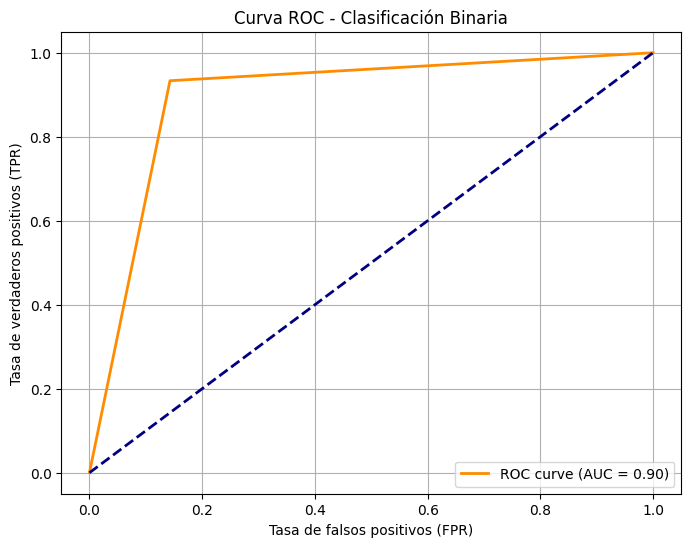

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 6. Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Clasificación Binaria')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Atributo más discriminante

In [ ]:
importances = clf.feature_importances_
importances_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

,Feature,Importance
6,OFF,0.640966
4,3p%,0.156027
9,APG,0.089849
5,FT%,0.037424
11,BPG,0.019525
8,RPG,0.019342
2,MPG,0.019039
14,PPG,0.017828
3,FG%,0.000000
0,G,0.000000


¿Cuál el el atributo más discriminante? De una explicación a partir del conocimiento del
problema.

**RTA:** Según los resultados del método feature_importances_ aplicado al árbol de decisión construido para el conjunto de datos de la NBA, se identificaron las características más influyentes en la creación del modelo. Las tres variables con mayor importancia fueron OFF(Rebotes ofensivos
), 3P%(Porcentaje de tiro de tres puntos) y APG(Asistencias por partido
). Se destaca especialmente el atributo OFF, con una puntuación de importancia de 0.64, lo que indica que fue un factor altamente relevante en el proceso de clasificación.

Reglas de clasificación a partir del arbol.

In [ ]:
rules = export_text(clf, feature_names=x.columns.tolist())
print(rules)

|--- OFF <= 1.05
|   |--- 3p% <= 0.04
|   |   |--- PPG <= 1.45
|   |   |   |--- class: 0
|   |   |--- PPG >  1.45
|   |   |   |--- class: 1
|   |--- 3p% >  0.04
|   |   |--- MPG <= 6.05
|   |   |   |--- class: 1
|   |   |--- MPG >  6.05
|   |   |   |--- RPG <= 4.85
|   |   |   |   |--- APG <= 0.65
|   |   |   |   |   |--- 3p% <= 0.34
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 3p% >  0.34
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- APG >  0.65
|   |   |   |   |   |--- class: 0
|   |   |   |--- RPG >  4.85
|   |   |   |   |--- class: 1
|--- OFF >  1.05
|   |--- APG <= 4.35
|   |   |--- FT% <= 0.83
|   |   |   |--- BPG <= 0.25
|   |   |   |   |--- class: 0
|   |   |   |--- BPG >  0.25
|   |   |   |   |--- class: 1
|   |   |--- FT% >  0.83
|   |   |   |--- class: 0
|   |--- APG >  4.35
|   |   |--- class: 0



**Regla 1:** Si el jugador tiene menos de 1.05 pérdidas por partido (OFF ≤ 1.05), un porcentaje de triples (3p%) menor o igual a 0.04, y promedia menos de 1.45 puntos por partido (PPG ≤ 1.45), entonces se clasifica como clase 0 (perimetral (Guard,Guard-Forward ó Forward-Guard)).

**Regla 2:** Si el jugador tiene menos de 1.05 pérdidas por partido (OFF ≤ 1.05), un porcentaje de triples mayor a 0.04, juega más de 6.05 minutos por partido (MPG > 6.05), y atrapa más de 4.85 rebotes por partido (RPG > 4.85), entonces se clasifica como clase 1 (internos (Forward, Forward-Center, Center ó Center-Forward)).

**Regla 3:** Si el jugador tiene más de 1.05 pérdidas por partido (OFF > 1.05), reparte más de 4.35 asistencias por partido (APG > 4.35), entonces se clasifica como clase 0. Esto sugiere que aunque pierda más balones, si compensa con una alta generación de juego (asistencias), sigue perteneciendo a clase 0 (perimetral (Guard,Guard-Forward ó Forward-Guard)).

### Punto 4:

Complejidad del modelo y sobre-aprendizaje:

a) Modifique el modelo anterior para que también calcule el desempeño en el conjunto de entre-
namiento.

b) Haga diferentes pruebas cambiando la profundidad máxima del árbol. Pruebe los valores 1,2,...,10.

c) Grafique a profundidad del árbol contra la evolución del error de entrenamiento y el error de prueba.

d) De acuerdo con la gráfica, ¿Cuál sería un buen valor de profundidad para el árbol?

In [ ]:
def evaluar(y_true, y_pred, dataset_name):
    print(f"=== Desempeño en {dataset_name} ===")
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    print(f"Exactitud: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Error de clasificación: {1 - accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-score (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")
    print()

In [ ]:
# Evaluar en ambos conjuntos
evaluar(y_train, y_pred_train, "Entrenamiento")
evaluar(y_test, y_pred_test, "Prueba")

=== Desempeño en Entrenamiento ===
Matriz de confusión:
[[134   0]
 [  0  81]]
Exactitud: 1.0000
Error de clasificación: 0.0000
Precisión (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000

=== Desempeño en Prueba ===
Matriz de confusión:
[[54  9]
 [ 2 28]]
Exactitud: 0.8817
Error de clasificación: 0.1183
Precisión (macro): 0.8605
Recall (macro): 0.8952
F1-score (macro): 0.8717



Pruebas a diferentes profundidades

Profundidad: 1 | Acc. Entrenamiento: 0.9070 | Acc. Prueba: 0.8280
Profundidad: 2 | Acc. Entrenamiento: 0.9674 | Acc. Prueba: 0.9032
Profundidad: 3 | Acc. Entrenamiento: 0.9860 | Acc. Prueba: 0.9032
Profundidad: 4 | Acc. Entrenamiento: 0.9953 | Acc. Prueba: 0.9032
Profundidad: 5 | Acc. Entrenamiento: 0.9953 | Acc. Prueba: 0.9032
Profundidad: 6 | Acc. Entrenamiento: 1.0000 | Acc. Prueba: 0.8817
Profundidad: 7 | Acc. Entrenamiento: 1.0000 | Acc. Prueba: 0.8817
Profundidad: 8 | Acc. Entrenamiento: 1.0000 | Acc. Prueba: 0.8817
Profundidad: 9 | Acc. Entrenamiento: 1.0000 | Acc. Prueba: 0.8817
Profundidad: 10 | Acc. Entrenamiento: 1.0000 | Acc. Prueba: 0.8817


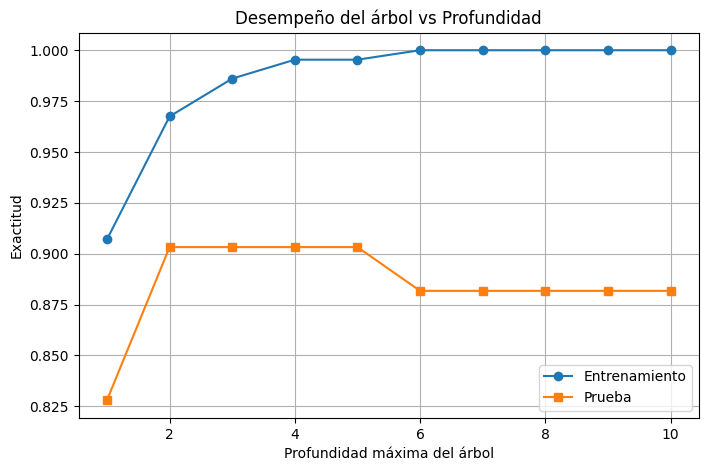

In [ ]:
# 3. Probar diferentes profundidades
depths = list(range(1, 11))
train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []
for d in depths:
    clf = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(x_train, y_train)

    # Predicciones
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    # Exactitudes
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

    print(f"Profundidad: {d} | Acc. Entrenamiento: {acc_train:.4f} | Acc. Prueba: {acc_test:.4f}")

# 4. Graficar curva de exactitud vs profundidad
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, marker='o', label='Entrenamiento')
plt.plot(depths, test_accuracies, marker='s', label='Prueba')
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Exactitud")
plt.title("Desempeño del árbol vs Profundidad")
plt.legend()
plt.grid(True)
plt.show()

Profundidad del arbol contra la evolución del error

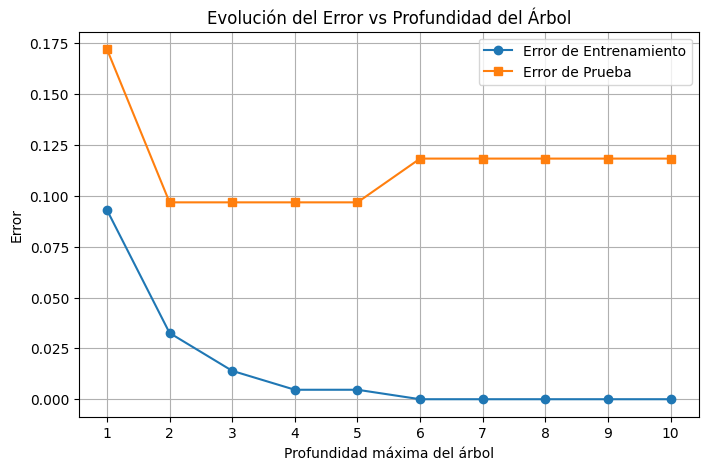

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(depths, train_errors, marker='o', label='Error de Entrenamiento')
plt.plot(depths, test_errors, marker='s', label='Error de Prueba')
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Error")
plt.title("Evolución del Error vs Profundidad del Árbol")
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

De acuerdo con la gráfica, ¿Cuál sería un buen valor de profundidad para el árbol?

**RTA:** Un buen valor de profundidad para el árbol es entre 2 y 5, idealmente profundidad = 2 o 3, ya que en ese rango se alcanza la mejor precisión en los datos de prueba sin sobreajustar el modelo. A partir de profundidad 6, el modelo comienza a memorizar los datos de entrenamiento y pierde capacidad de generalización.

### Punto 5:

Curva de aprendizaje:

a) Cambie la proporción de datos usados para entrenar usando diferentes valores: 10 %, 20 %,...,90%.

b) Grafique la evolución del error de entrenamiento y el de prueba contra el porcentaje de ejemplos de entrenamiento.

c) Explique el comportamiento de las curvas.

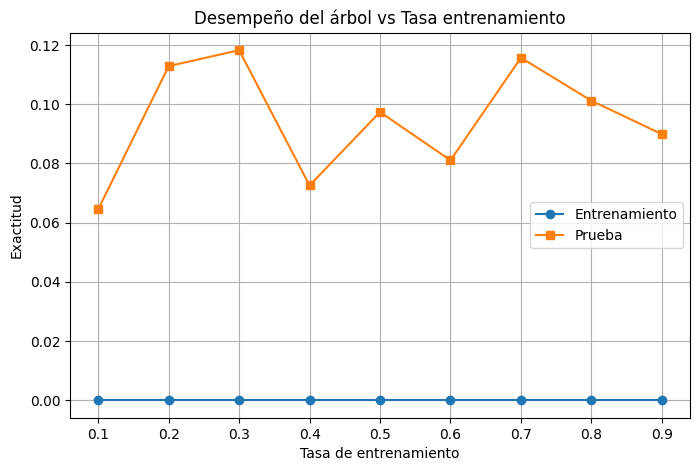

In [ ]:

train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []
size_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for size in size_list:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size,  random_state=42)

  clf = tree.DecisionTreeClassifier( random_state=42)
  clf.fit(x_train, y_train)

  # Predicciones
  y_train_pred = clf.predict(x_train)
  y_test_pred = clf.predict(x_test)

  train_error = 1 - accuracy_score(y_train, y_train_pred)
  test_error = 1 - accuracy_score(y_test, y_test_pred)

  train_errors.append(train_error)
  test_errors.append(test_error)

  #print(f"Profundidad: {d} | Acc. Entrenamiento: {acc_train:.4f} | Acc. Prueba: {acc_test:.4f}")

# 4. Graficar curva de exactitud vs profundidad
plt.figure(figsize=(8, 5))
plt.plot(size_list, train_errors, marker='o', label='Entrenamiento')
plt.plot(size_list, test_errors, marker='s', label='Prueba')
plt.xlabel("Tasa de entrenamiento")
plt.ylabel("Exactitud")
plt.title("Desempeño del árbol vs Tasa entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

## Nearest Neighbor

### Punto 1:

1. Suponga que los ejemplos categóricos de 5 dimensiones:



estan distribuidos en dos grupos:
 C1={A,B,E} Y C2={C,D,F}

a) Use el algoritmo de k-nearest neighbor para encontrar la clasificación de los siguientes
ejemplos:

Y={1,1,0,1,1] usando K = 1

Y={1,1,0,1,1] usando K = 3

Y={0,1,0,0,0] usando K = 1

Y={0,1,0,0,0] usando K = 5

b) Discuta los resultados


In [1]:
import numpy as np
from collections import Counter

# Datos
X = np.array([
    [1, 0, 1, 1, 0],  # A
    [1, 1, 0, 1, 0],  # B
    [0, 0, 1, 1, 0],  # C
    [0, 1, 0, 1, 0],  # D
    [1, 0, 1, 0, 1],  # E
    [0, 1, 1, 0, 0]   # F
])

etiquetas = ['C1', 'C1', 'C2', 'C2', 'C1', 'C2']
nombres = ['A', 'B', 'C', 'D', 'E', 'F']

# Distacia de Hamming debido a que son datos binarios
def hamming_dist(x, y):
    return np.sum(x != y)

# k-NN para clasificar un vector
def knn_classify(X, etiquetas, Y, k):
    distancias = [hamming_dist(Y, x) for x in X]
    vecinos_idx = np.argsort(distancias)[:k]
    vecinos_clases = [etiquetas[i] for i in vecinos_idx]
    votos = Counter(vecinos_clases)
    clase_predicha = votos.most_common(1)[0][0]
    return clase_predicha, [(nombres[i], distancias[i], etiquetas[i]) for i in vecinos_idx]

# Casos a clasificar
casos = [
    ([1, 1, 0, 1, 1], 1),
    ([1, 1, 0, 1, 1], 3),
    ([0, 1, 0, 0, 0], 1),
    ([0, 1, 0, 0, 0], 5)
]

# Realixar la lasificación
for i, (Y, k) in enumerate(casos, 1):
    clase, vecinos = knn_classify(X, etiquetas, np.array(Y), k)
    print(f"Caso {i}: Y = {Y}, K = {k} → Clase = {clase}")
    for nombre, dist, clase_v in vecinos:
        print(f"  Vecino: {nombre} (Clase: {clase_v}, Distancia: {dist})")
    print()


Caso 1: Y = [1, 1, 0, 1, 1], K = 1 → Clase = C1
  Vecino: B (Clase: C1, Distancia: 1)

Caso 2: Y = [1, 1, 0, 1, 1], K = 3 → Clase = C1
  Vecino: B (Clase: C1, Distancia: 1)
  Vecino: D (Clase: C2, Distancia: 2)
  Vecino: A (Clase: C1, Distancia: 3)

Caso 3: Y = [0, 1, 0, 0, 0], K = 1 → Clase = C2
  Vecino: D (Clase: C2, Distancia: 1)

Caso 4: Y = [0, 1, 0, 0, 0], K = 5 → Clase = C2
  Vecino: D (Clase: C2, Distancia: 1)
  Vecino: F (Clase: C2, Distancia: 1)
  Vecino: B (Clase: C1, Distancia: 2)
  Vecino: C (Clase: C2, Distancia: 3)
  Vecino: A (Clase: C1, Distancia: 4)



Los resultados obtenidos al aplicar el algoritmo k-Nearest Neighbors (k-NN) muestran que la clasificación varía según el valor de K, siendo más sensible a ruidos con K=1 y más robusta con K=3 o K=5, al considerar el contexto de vecinos adicionales. En los casos analizados, los vectores de prueba fueron clasificados consistentemente como C1 o C2, lo que sugiere una adecuada separación entre clases en el espacio binario y una buena distribución de ejemplos representativos en la vecindad. Por ejemplo, el vector [1,1,0,1,1] fue clasificado como C1 tanto con K=1 como con K=3, y el vector [0,1,0,0,0] fue clasificado como C2 incluso al aumentar K a 5, lo cual indica que las regiones locales del espacio de características están dominadas por ejemplos de la misma clase.

## Validación



### Punto 1:

Se tiene la siguiente tabla correspondiente a 10 registros con su clase (5 +, y 5 -), la clase corresponde
a la segunda columna. La tercera columna corresponde a la probabilidad “Posterior” P(+|x) generada
por un clasificador “Naive Bayes” ordenados. Las otras columnas corresponden a TP, FP, TN y FN
cuando se clasifican todos los registros mayores a la P(+|x) del registro actual como clase +, y los
que son menores a P(+|x) como clase -. Por ejemplo, los valores de la primera fila indican que los 10
resgistros fueron clasificados como +, pero 5 son de la clase - (FP); los valores de la segunda fila indican
que 9 registros fueron clasificados como +, y 1 como - (5 son de la clase -); los valores de la tercera fila
indican que 8 registros fueron clasificados como +, de los cuales 4 son de la clase -.

a) Calcular la TPR y FPR T P R =
T P
T P +F N , F P R =
F P
T N+F P

1) Dibujar la curva Receiver Operating Characteristics (ROC)

2) Analizar el resultado, comparar con la ROC en caso de que se adivinará el resultado del
clasificador.

   clase  P(+|x)  TP  FP  TN  FN  TPR  FPR
0      +    0.25   5   5   0   0  1.0  1.0
1      -    0.43   4   5   0   1  0.8  1.0
2      +    0.53   4   4   1   1  0.8  0.8
3      -    0.76   3   4   1   2  0.6  0.8
4      -    0.85   3   3   2   2  0.6  0.6
5      -    0.85   3   2   3   2  0.6  0.4
6      +    0.85   3   1   4   2  0.6  0.2
7      -    0.87   2   1   4   3  0.4  0.2
8      +    0.93   2   0   5   3  0.4  0.0
9      +    0.95   1   0   5   4  0.2  0.0
10    NA    1.00   0   0   5   5  0.0  0.0


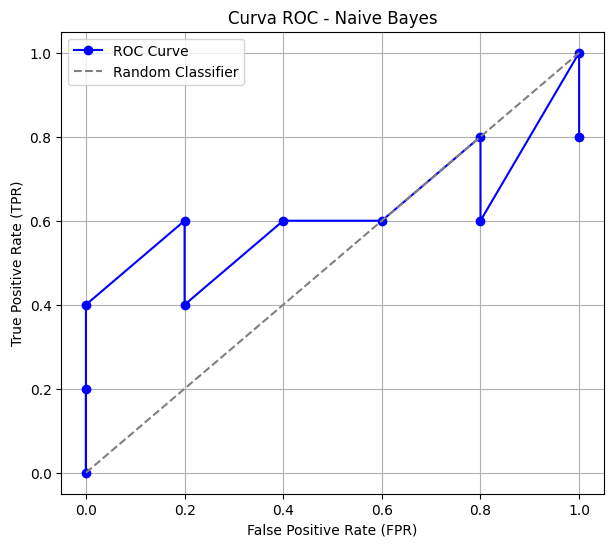

In [7]:
# ingresar data

import pandas as pd

# Datos base
data = {
    'clase':    ['+', '-', '+', '-', '-', '-', '+', '-', '+', '+', 'NA'],
    'P(+|x)':   [0.25, 0.43, 0.53, 0.76, 0.85, 0.85, 0.85, 0.87, 0.93, 0.95, 1.00],
    'TP':       [5, 4, 4, 3, 3, 3, 3, 2, 2, 1, 0],
    'FP':       [5, 5, 4, 4, 3, 2, 1, 1, 0, 0, 0],
    'TN':       [0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 5],
    'FN':       [0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5]
}

df = pd.DataFrame(data)


#calcular las columnas ,evitar divisiones por cero
df['TPR'] = df['TP'] / (df['TP'] + df['FN'])
df['FPR'] = df['FP'] / (df['FP'] + df['TN'])


print(df)


import matplotlib.pyplot as plt

# Ordenar por FPR ascendente
df_sorted = df.sort_values('FPR')

# Graficar
plt.figure(figsize=(7, 6))
plt.plot(df_sorted['FPR'], df_sorted['TPR'], marker='o', label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Classifier')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()





El gráfico tiene una forma escalonada, por que se tienen muy pocos puntos.
Algunos tramos la curva se acerca a la línea gris (clasificador aleatorio como en el FPR 0.6 a 0.8), hay puntos en los que se aleja claramente hacia la parte superior izquierda, lo cual indica que el modelo sí tiene capacidad predictiva.

Las en la TPR con aumento en FPR:
En algunos segmentos (por ejemplo, entre FPR = 0.8 y 1.0), la TPR disminuye o no mejora, a pesar de que la FPR aumenta indica malas decisiones del clasificador. Se están clasificando como positivas más instancias negativas sin ganar verdaderos positivos.


## Comparación modelos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [ ]:
# Cargar el conjunto de datos
nba_df = pd.read_csv("nba.txt", sep=' ', comment='#')
nba_df

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,24.4,0.466,0.405,0.800,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8,1
1,19,0,11.9,0.273,0.298,0.970,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6,1
2,1148,1140,36.9,0.452,0.400,0.894,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0,1
3,466,170,19.8,0.482,0.284,0.745,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8,1
4,38,1,9.5,0.381,0.292,0.743,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,12.0,0.414,0.000,0.478,0.9,1.9,2.8,0.2,0.5,0.4,1.1,1.6,2.5,2
304,19,0,5.8,0.444,0.000,0.417,0.8,1.2,2.1,0.0,0.2,0.8,0.3,0.7,1.5,2
305,43,5,14.7,0.507,0.000,0.652,1.5,2.1,3.6,0.3,0.5,0.4,0.5,1.4,4.6,2
306,137,29,14.4,0.511,0.000,0.624,1.3,2.1,3.4,0.3,0.3,1.2,0.9,2.4,4.2,2


In [ ]:
# Partición del conjunto de datos
x = nba_df.drop(columns=['Class'])
y = nba_df['Class']
y = np.where(y == 1, 0, 1)

### Punto 1:

1. Entrene un modelo de clasificación Naïve Bayes y evalúelo usando validación cruzada de tamaño
10

In [ ]:
# Entrenar el modelo de arbol de decisión
clf = tree.DecisionTreeClassifier(random_state=42)
scores_decision_tree = cross_val_score(clf, x, y, cv=10)
scores_decision_tree

### Punto 2:

Entrene un árbol de decisión y evalúelo usando validación cruzada con 10

In [ ]:
# Entrenar modelo Naive Bayes
gnb = GaussianNB()
scores_gnb = cross_val_score(gnb, x, y, cv=10)
scores_gnb

array([0.93548387, 0.90322581, 0.96774194, 1.        , 0.96774194,
       0.87096774, 1.        , 1.        , 1.        , 0.96666667])

In [ ]:
print("Media Árbol:", scores_decision_tree.mean())
print("Desviación estándar Árbol:", scores_decision_tree.std())

print("Media NB:", scores_gnb.mean())
print("Desviación estándar NB:", scores_gnb.std())


Media Árbol: 0.9190322580645163
Desviación estándar Árbol: 0.046309145324512135
Media NB: 0.9611827956989247
Desviación estándar NB: 0.042780161441637855


### Punto 3:

¿Cuál de los dos modelos es mejor?

Al realizar la validación cruzada con 10 particiones, se calcula la media y la desviación estándar de los modelos a partir de los resultados de precisión obtenidos en cada prueba.

El modelo Naive Bayes muestra mejores resultados tanto en precisión como en la baja dispersión de sus valores. Sin embargo, un valor de precisión tan alto podría indicar que el modelo se sobreajustó más que el otro.

## Clasificación con costos

### Punto 1:

Utilice el conjunto de datos credit-german.csv

In [31]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
df = pd.read_csv("/content/German_Credit_Data.csv", sep=";")

# Guardar columna de clase original antes de codificar
y = df["class"]

# Codificar el resto
for col in df.select_dtypes(include=['object']).columns:
    if col != "class":
        df[col] = LabelEncoder().fit_transform(df[col])

# Separar características
X = df.drop("class", axis=1)

# Convertir clase: Good = 1, Bad = 0
y = y.apply(lambda x: 1 if x == "good" else 0)


### Punto 2:

Entrene un modelo Naïve Bayes usando validación cruzada

In [32]:
gnb = GaussianNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(gnb, X, y, cv=cv)

# Matriz de confusión
cm_original = confusion_matrix(y, y_pred)
print("Matriz de Confusión Original:")
print(cm_original)

print("\nReporte de clasificación:")
print(classification_report(y, y_pred))



Matriz de Confusión Original:
[[151 149]
 [136 564]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       300
           1       0.79      0.81      0.80       700

    accuracy                           0.71      1000
   macro avg       0.66      0.65      0.66      1000
weighted avg       0.71      0.71      0.71      1000



### Punto 3:

Suponiendo que la clase Good es positiva, ¿cuántos falsos positivos tiene el modelo resultante? ¿cuántos
falsos negativos? De acuerdo con el problem, qué tipo de error debería ser más costoso?

In [33]:
tn, fp, fn, tp = cm_original.ravel()
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

# Análisis: ¿Qué error es más costoso?
print("En un escenario de crédito, un FN (rechazar buen cliente) puede costar en oportunidad,\n"
      "pero un FP (aceptar mal cliente) puede significar una pérdida financiera directa.\n"
      "Por tanto, FP debería considerarse más costoso.")



Falsos Positivos (FP): 149
Falsos Negativos (FN): 136
En un escenario de crédito, un FN (rechazar buen cliente) puede costar en oportunidad,
pero un FP (aceptar mal cliente) puede significar una pérdida financiera directa.
Por tanto, FP debería considerarse más costoso.


### Punto 4:

Utilice MetaCost (operador: MetaCost) para sesgar el modelo de manera que se disminuya el número
de errores costosos. Utilice una matriz de costo donde un tipo de error sea 10 veces más costoso que el
otro.

In [34]:
# Obtener probabilidades
y_proba = cross_val_predict(gnb, X, y, cv=cv, method='predict_proba')

# Definir matriz de costo:
# C = [[TN=0, FP=10],
#      [FN=1, TP=0]]
cost_FP = 10
cost_FN = 1

# Calcular costo esperado y predecir clase minimizando costo
expected_cost = cost_FP * y_proba[:, 0]  # prob de clase 0 ("Bad") → FP
expected_no_cost = cost_FN * y_proba[:, 1]  # prob de clase 1 ("Good") → FN

# Si el costo de FP es mayor, se requiere mayor confianza para clasificar como "Good"
y_pred_metacost = (expected_no_cost < expected_cost).astype(int)

# Nueva matriz de confusión
cm_cost = confusion_matrix(y, y_pred_metacost)
print("Matriz de Confusión con MetaCost (costo FP = 10):")
print(cm_cost)


Matriz de Confusión con MetaCost (costo FP = 10):
[[ 24 276]
 [260 440]]


### Punto 5:

Evalue la matriz de confusión resultante y compárela con la original. ¿Se cumplió el objetivo?

In [35]:
tn_c, fp_c, fn_c, tp_c = cm_cost.ravel()
print(f"Nuevos FP: {fp_c}, Nuevos FN: {fn_c}")

print("Comparación:")
print(f"Original → FP: {fp}, FN: {fn}")
print(f"MetaCost → FP: {fp_c}, FN: {fn_c}")

if fp_c < fp:
    print("Se logró reducir los falsos positivos (errores más costosos).")
else:
    print("No se logró reducir los errores más costosos.")

print("\nReporte de clasificación:")
print(classification_report(y, y_pred_metacost))


Nuevos FP: 276, Nuevos FN: 260
Comparación:
Original → FP: 149, FN: 136
MetaCost → FP: 276, FN: 260
No se logró reducir los errores más costosos.

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.08      0.08      0.08       300
           1       0.61      0.63      0.62       700

    accuracy                           0.46      1000
   macro avg       0.35      0.35      0.35      1000
weighted avg       0.46      0.46      0.46      1000



## Ensambladores

Un ensamblador de clasificadores construye un conjunto de clasificadores base a partir de los datos de entrena-
miento y realiza una clasificación votando las predicciones hechas por cada clasificador base. En el siguiente

ejemplo, consideramos 3 tipos de ensmabladors ed clasificación: bagging, boosting, and random forest. Se
puede encontrar una explicación detallada sobre estos clasificadores en la Sección 4.10 del libro. Ajustamos
500 clasificadores base al conjunto de datos bidimensionales usando cada ensamblador. El clasificador base
corresponde a un árbol de decisión con una profundidad máxima igual a 10 (código en python). Ejecute el
ejemplo y explique resultados.

dimension Training: (700, 2), (700,)
dimension Test: (300, 2), (300,)
Entrenamiento de ensambladores
Entrenando Random Forest...
Random Forest - Train Accuracy: 0.9943, Test Accuracy: 0.9200
Entrenando Bagging Classifier...
Bagging - Train Accuracy: 0.9957, Test Accuracy: 0.9300
Entrenando AdaBoost Classifier...
AdaBoost - Train Accuracy: 1.0000, Test Accuracy: 0.9133


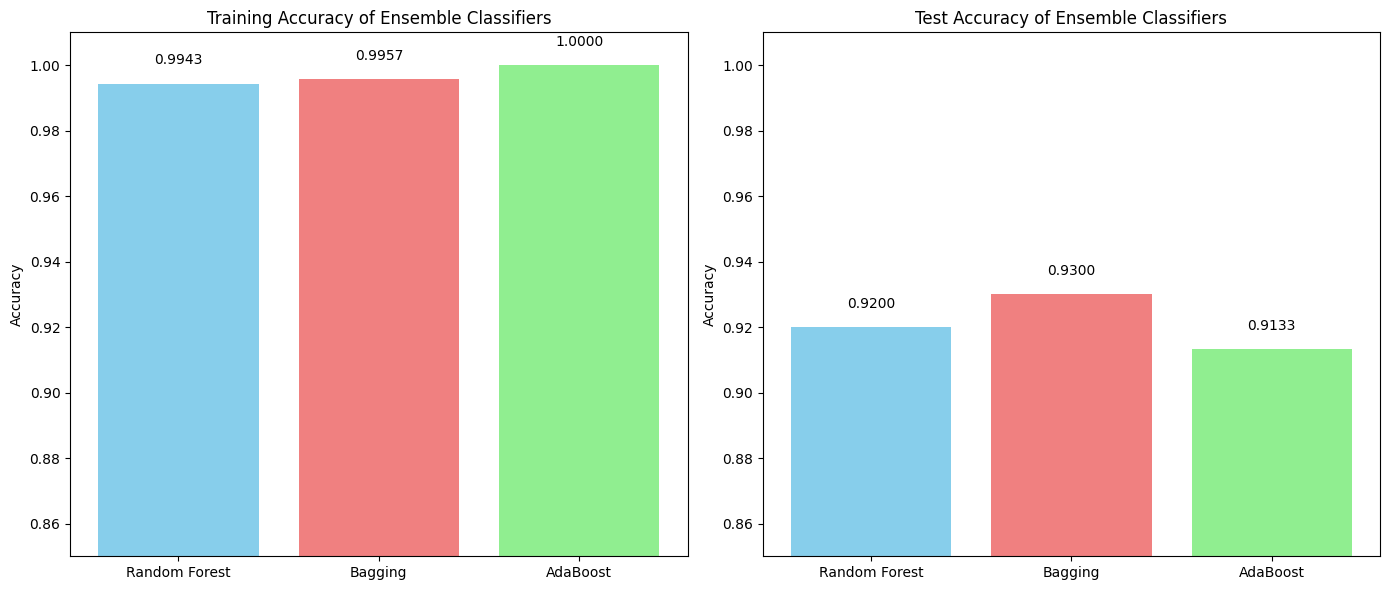


**Precisiones:**
  Random Forest - Train: 0.9943, Test: 0.9200
  Bagging       - Train: 0.9957, Test: 0.9300
  AdaBoost      - Train: 1.0000, Test: 0.9133


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons # dataset

# Generar datos simulados
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"dimension Training: {X_train.shape}, {Y_train.shape}")
print(f"dimension Test: {X_test.shape}, {Y_test.shape}")

# Algoritmo 1: codigo de ensambladores
numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

print("Entrenamiento de ensambladores")

# Random Forest
print("Entrenando Random Forest...")
clf_rf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers, max_depth=maxdepth, random_state=42)
clf_rf.fit(X_train, Y_train)
Y_predTrain_rf = clf_rf.predict(X_train)
Y_predTest_rf = clf_rf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain_rf))
testAcc.append(accuracy_score(Y_test, Y_predTest_rf))
print(f"Random Forest - Train Accuracy: {trainAcc[-1]:.4f}, Test Accuracy: {testAcc[-1]:.4f}")

# Bagging
print("Entrenando Bagging Classifier...")
clf_bagging = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth, random_state=42),
                                         n_estimators=numBaseClassifiers, random_state=42)
clf_bagging.fit(X_train, Y_train)
Y_predTrain_bagging = clf_bagging.predict(X_train)
Y_predTest_bagging = clf_bagging.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain_bagging))
testAcc.append(accuracy_score(Y_test, Y_predTest_bagging))
print(f"Bagging - Train Accuracy: {trainAcc[-1]:.4f}, Test Accuracy: {testAcc[-1]:.4f}")

# AdaBoost
print("Entrenando AdaBoost Classifier...")
clf_ada = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth, random_state=42),
                                     n_estimators=numBaseClassifiers, random_state=42, learning_rate=0.1)
clf_ada.fit(X_train, Y_train)
Y_predTrain_ada = clf_ada.predict(X_train)
Y_predTest_ada = clf_ada.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain_ada))
testAcc.append(accuracy_score(Y_test, Y_predTest_ada))
print(f"AdaBoost - Train Accuracy: {trainAcc[-1]:.4f}, Test Accuracy: {testAcc[-1]:.4f}")

methods = ['Random Forest', 'Bagging', 'AdaBoost']

# Plotear
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) # Increased figure size for better readability

# Train Accuracy Plot
ax1.bar([0, 1, 2], trainAcc, color=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(methods)
ax1.set_title('Training Accuracy of Ensemble Classifiers')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.85, 1.01) # Set y-limit for better visualization of differences

# Add text labels on top of bars
for i, acc in enumerate(trainAcc):
    ax1.text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom')


# Test Accuracy Plot
ax2.bar([0, 1, 2], testAcc, color=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(methods)
ax2.set_title('Test Accuracy of Ensemble Classifiers')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0.85, 1.01) # Set y-limit for better visualization of differences

# Add text labels on top of bars
for i, acc in enumerate(testAcc):
    ax2.text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("\n**Precisiones:**")
print(f"  Random Forest - Train: {trainAcc[0]:.4f}, Test: {testAcc[0]:.4f}")
print(f"  Bagging       - Train: {trainAcc[1]:.4f}, Test: {testAcc[1]:.4f}")
print(f"  AdaBoost      - Train: {trainAcc[2]:.4f}, Test: {testAcc[2]:.4f}")



- El método Random Forest construye un conjunto de árboles de decisión, donde cada árbol se entrena sobre un subconjunto de datos muestreados con reemplazo y usando una selección aleatoria de características. Las predicciones se realizan mediante votación en clasificación.

- Los tres métodos logran alta precisión en entrenamiento, lo cual es común dado que utilizan muchos clasificadores base y árboles con profundidad máxima de 10, permitiendo capturar patrones complejos. Al comparar Bagging y Random Forest, ambos muestran resultados similares ya que son métodos paralelos; sin embargo,

- En algunos casos Random Forest puede superar ligeramente a Bagging al introducir aleatoriedad adicional en la selección de características, lo cual genera árboles menos correlacionados y modelos más robustos. AdaBoost, aunque muy poderoso, puede ser más sensible al ruido y a los valores atípicos, ya que concentra su atención en las muestras más difíciles, lo que a veces puede llevar a sobreajuste.

- Si la precisión en entrenamiento es mucho mayor que en prueba, se está produciendo sobreajuste.


 - Los métodos de ensamblado como Random Forest y Bagging ayudan a reducirlo gracias a que promedian múltiples árboles, suavizando así los límites de decisión.

 - AdaBoost puede sobreajustar si se usa con demasiados clasificadores o clasificadores demasiado complejos

